#### Deliverable2 Group 8


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
df = pd.read_csv('/home/ec2-user/dataset.csv',low_memory=False)

In [5]:
df.shape

(958524, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [7]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [11]:
df.isnull().sum()

id                0.0
spkid             0.0
full_name         0.0
pdes              0.0
name              0.0
prefix            0.0
neo               0.0
pha               0.0
H                 0.0
diameter          0.0
albedo            0.0
diameter_sigma    0.0
orbit_id          0.0
epoch             0.0
epoch_mjd         0.0
epoch_cal         0.0
equinox           0.0
e                 0.0
a                 0.0
q                 0.0
i                 0.0
om                0.0
w                 0.0
ma                0.0
ad                0.0
n                 0.0
tp                0.0
tp_cal            0.0
per               0.0
per_y             0.0
moid              0.0
moid_ld           0.0
sigma_e           0.0
sigma_a           0.0
sigma_q           0.0
sigma_i           0.0
sigma_om          0.0
sigma_w           0.0
sigma_ma          0.0
sigma_ad          0.0
sigma_n           0.0
sigma_tp          0.0
sigma_per         0.0
class             0.0
rms               0.0
dtype: flo

In [12]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))
duplicate

Duplicate Rows :  0


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms


/tmp/ipykernel_11112/3420976358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='PuRd')


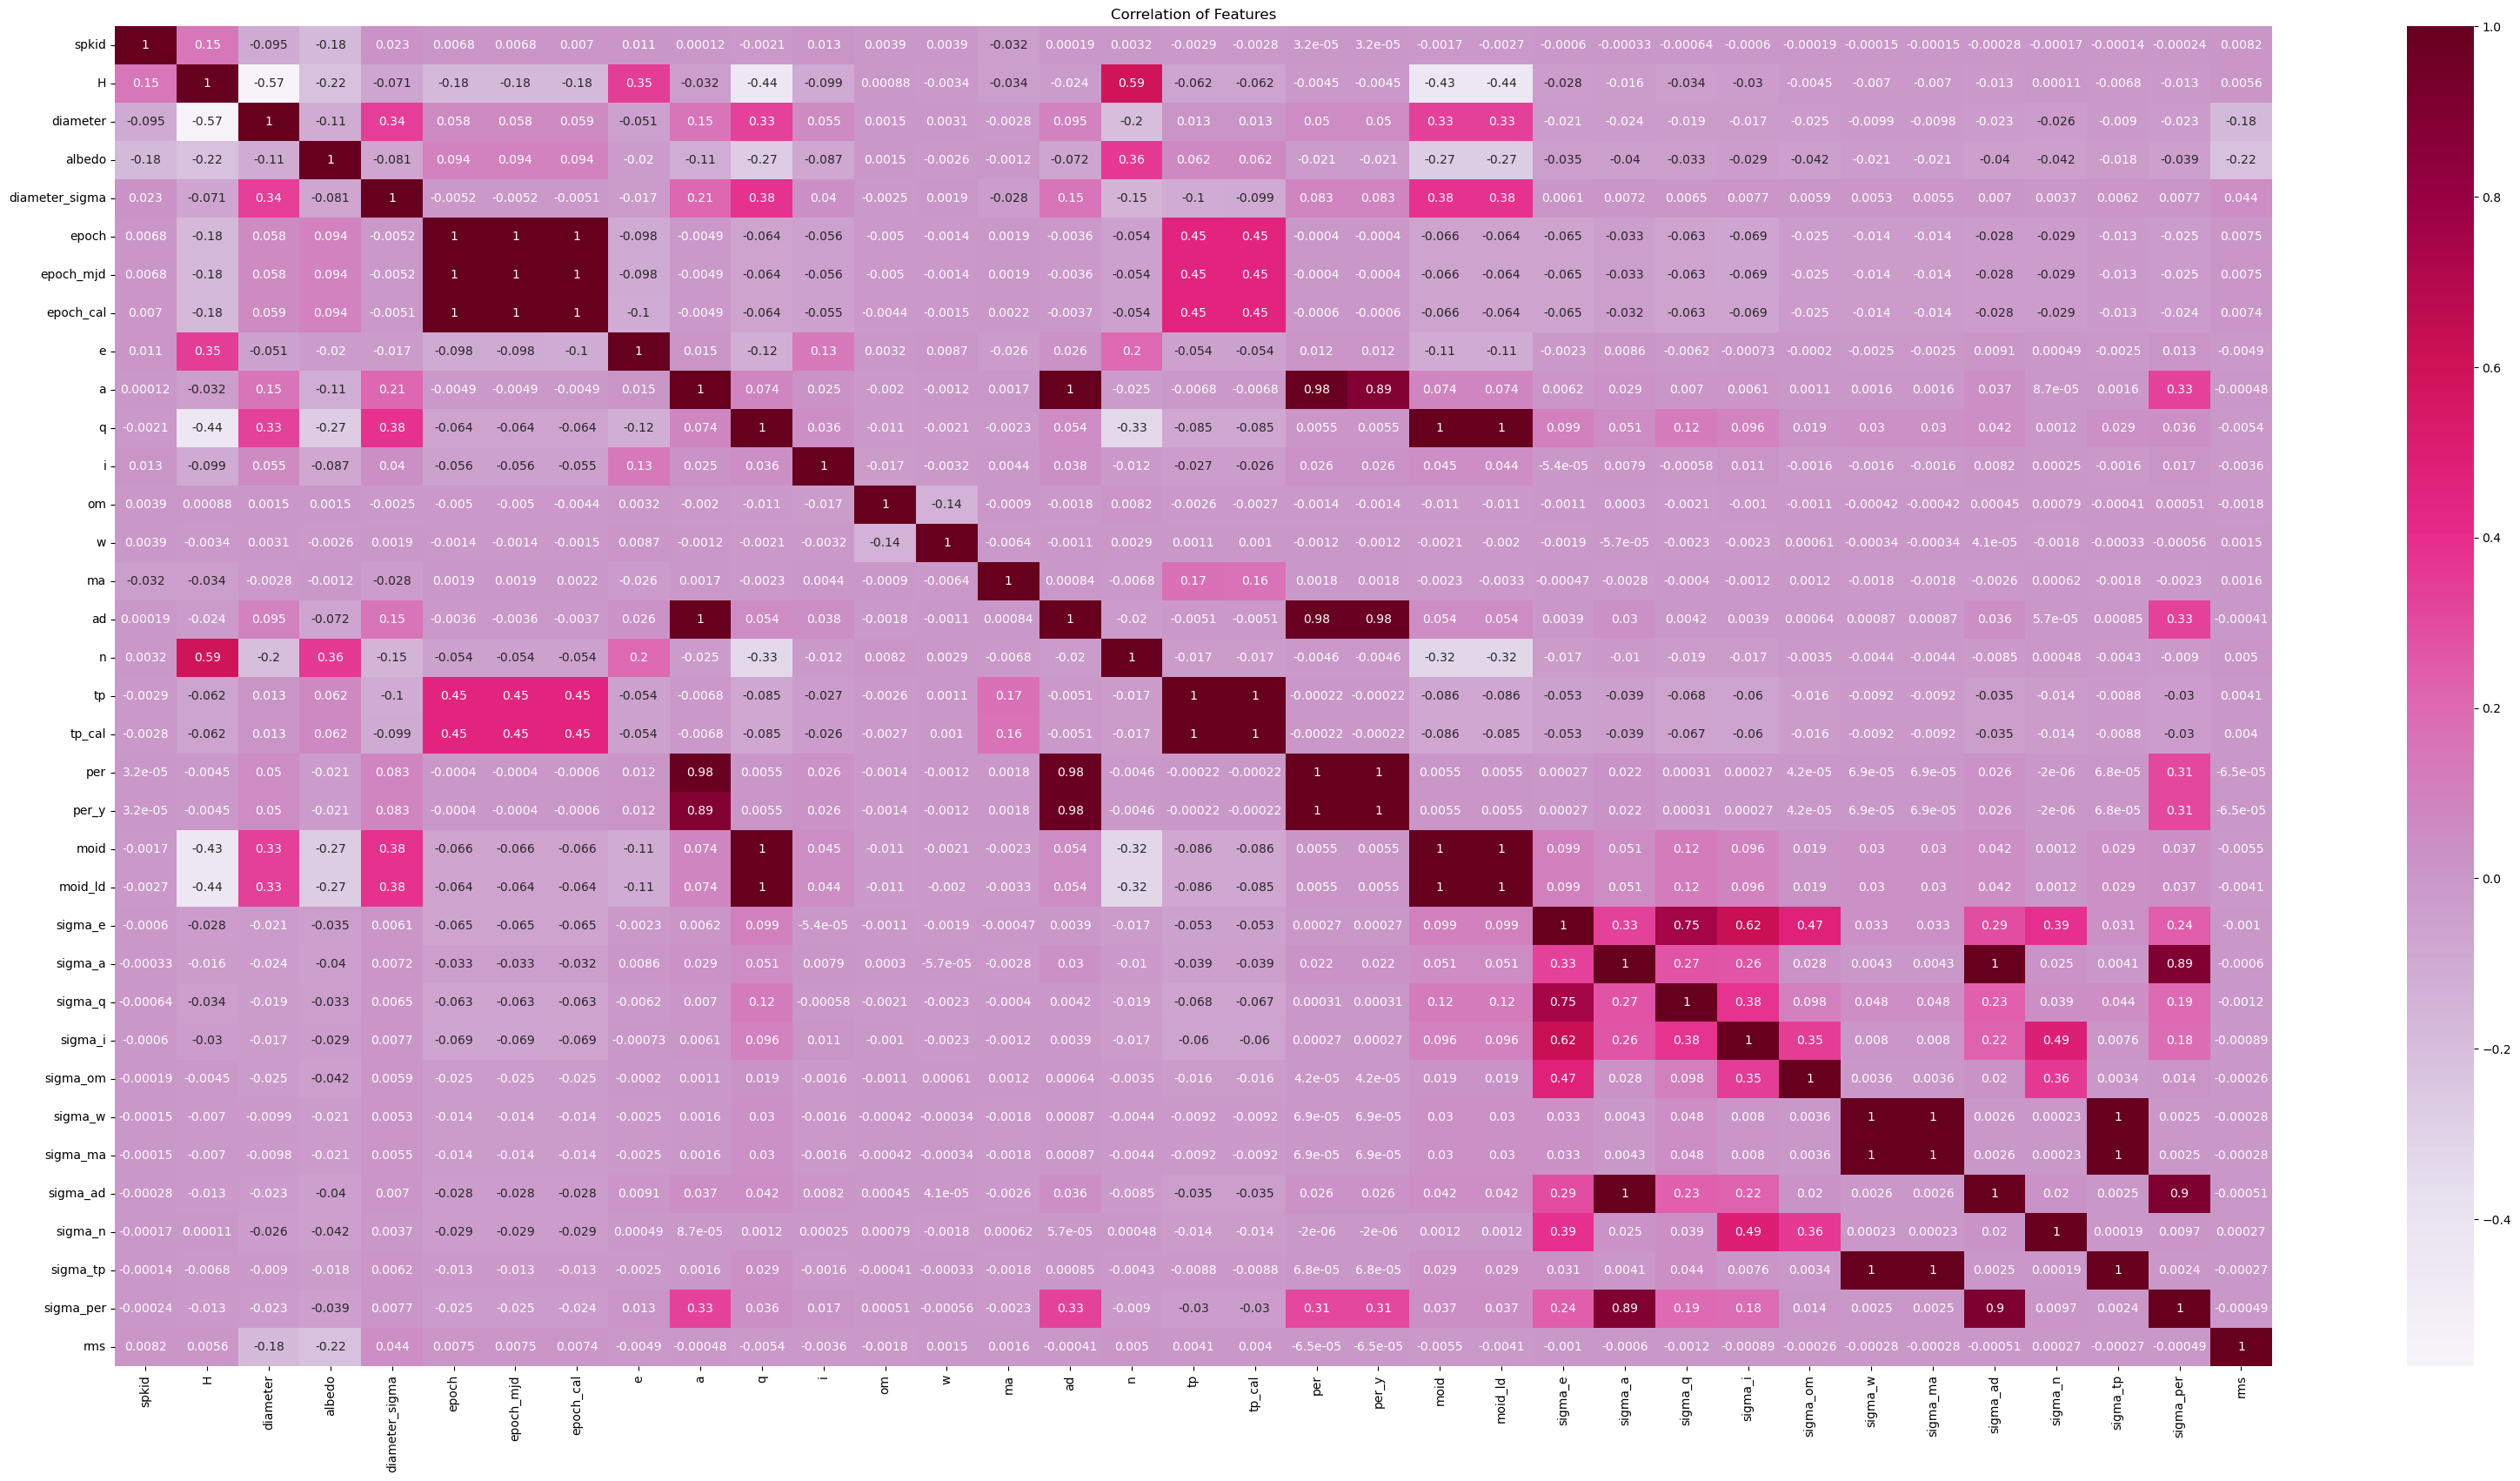

In [24]:
plt.figure(figsize = (40,20)) 
sns.heatmap(df.corr(), annot=True, cmap='PuRd') 
plt.title("Correlation of Features")
plt.show()


In [25]:
df.corr()['diameter']

/tmp/ipykernel_11112/1076428793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['diameter']


spkid            -0.095362
H                -0.572648
diameter          1.000000
albedo           -0.108880
diameter_sigma    0.337145
epoch             0.058475
epoch_mjd         0.058475
epoch_cal         0.058539
e                -0.050649
a                 0.146799
q                 0.329223
i                 0.054963
om                0.001530
w                 0.003115
ma               -0.002811
ad                0.094735
n                -0.199425
tp                0.013128
tp_cal            0.013350
per               0.050282
per_y             0.050282
moid              0.331983
moid_ld           0.331983
sigma_e          -0.020864
sigma_a          -0.023531
sigma_q          -0.019447
sigma_i          -0.017378
sigma_om         -0.024879
sigma_w          -0.009857
sigma_ma         -0.009806
sigma_ad         -0.023295
sigma_n          -0.025989
sigma_tp         -0.009043
sigma_per        -0.022720
rms              -0.182322
Name: diameter, dtype: float64

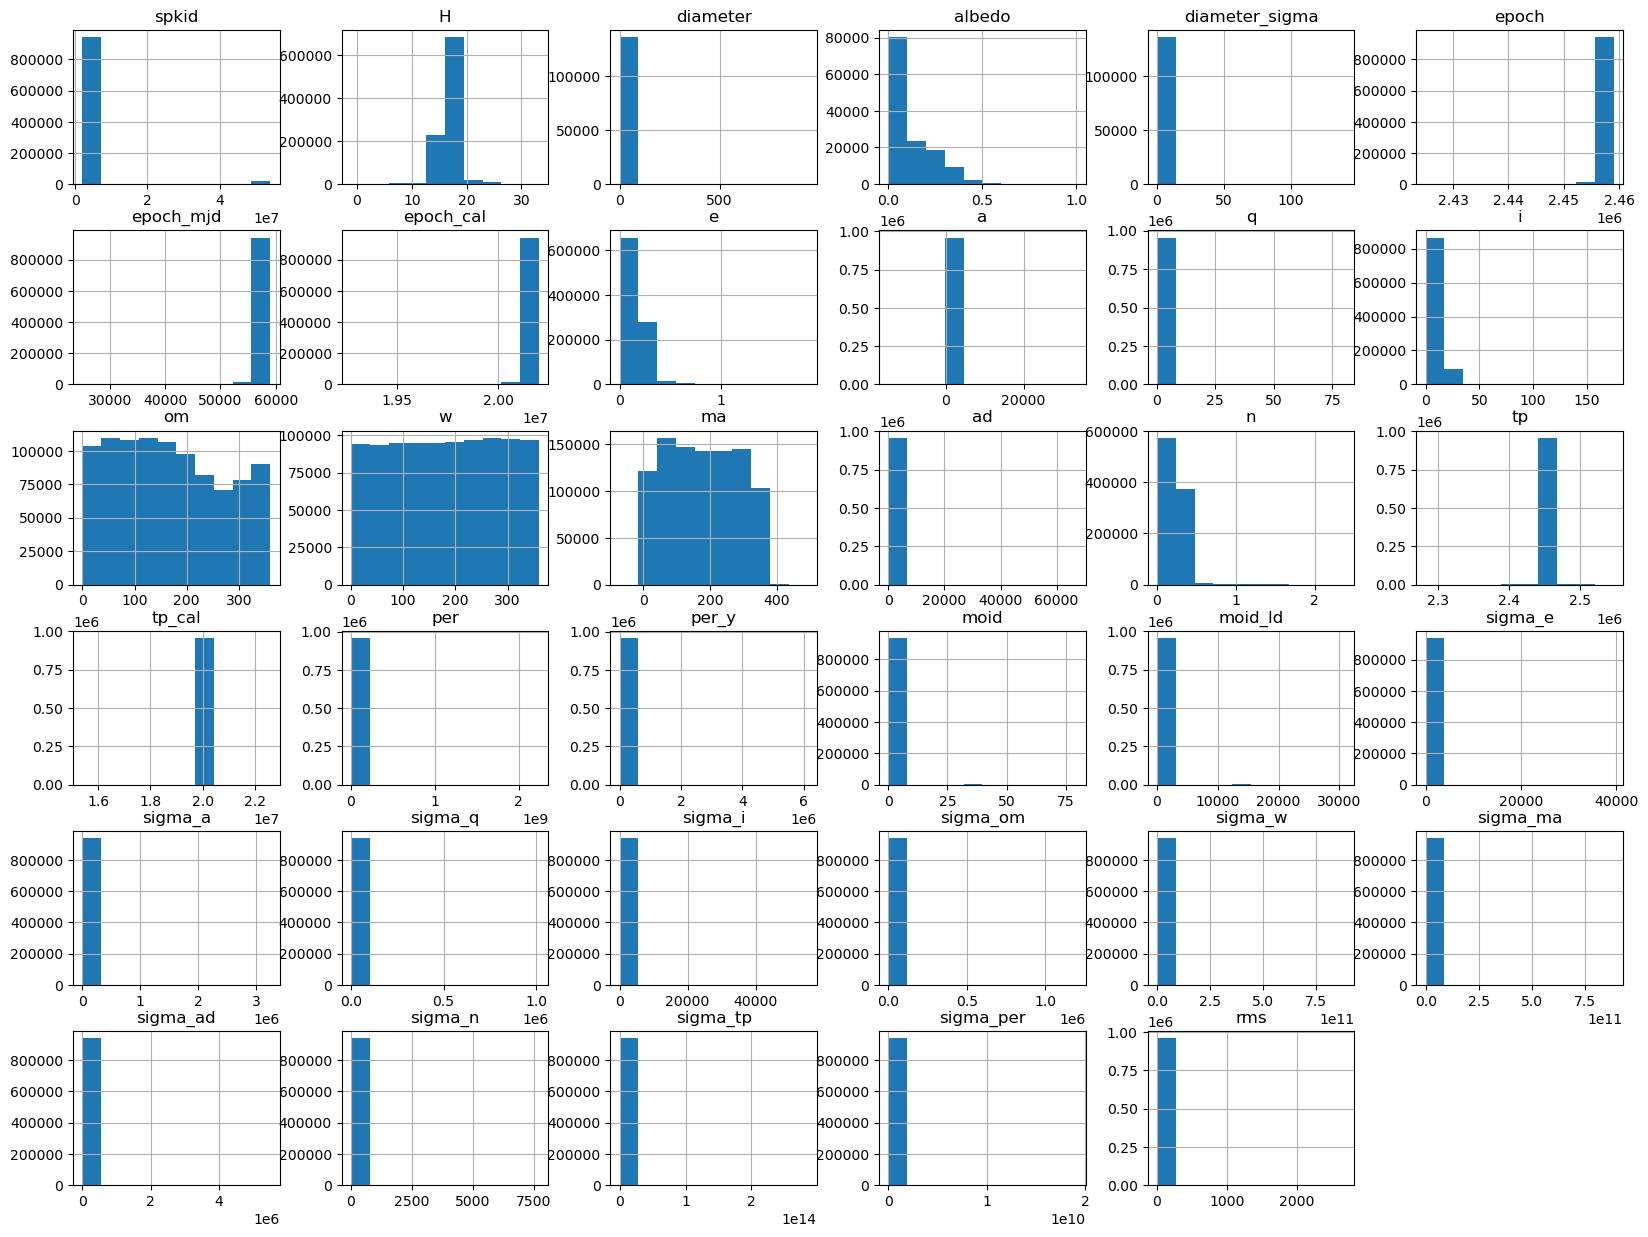

In [26]:
df.hist(figsize=(20,15));

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


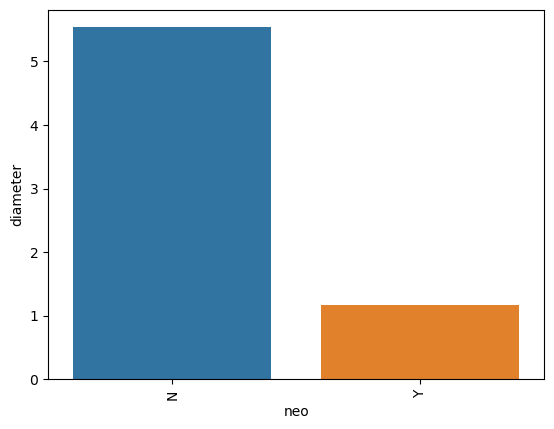

In [29]:
# Create a bar plot showing the mean value of the target for each category of a categorical column
sns.barplot(x='neo', y='diameter', data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

In [30]:
# Drop Columns to remain with Osculating Orbital Elements
df = df[['spkid', 'full_name', 'orbit_id',
    'e', 'a', 'q', 'i', 'n', 'tp', 'per', 'per_y',
       'class',
       'rms']].copy()
df.shape

(958524, 13)

In [31]:
df = df.rename(columns = {
    'e':'Eccentricity',
    'a':'Semi_Major_Axis',
    'q':'PerihelionDistance',
    'i':'Inclination',
    'M':'MeanAnomaly',
    'tp': 'Time_Perihelion_Passage',
    'n':'Mean_Motion',
    'Q':'Aphelion_Distance',
    'full_name':'FullName',
    'spkid':'SPKID',
    'class':'Classification',
    'per':'Period_Days',
    'per_y':'Period_Years'
}).copy()
df.head(10)

,SPKID,FullName,orbit_id,Eccentricity,Semi_Major_Axis,PerihelionDistance,Inclination,Mean_Motion,Time_Perihelion_Passage,Period_Days,Period_Years,Classification,rms
0,2000001,1 Ceres,JPL 47,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,1683.145703,4.608202,MBA,0.43301
1,2000002,2 Pallas,JPL 37,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,1687.410992,4.619880,MBA,0.35936
2,2000003,3 Juno,JPL 112,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,1592.013769,4.358696,MBA,0.33848
3,2000004,4 Vesta,JPL 35,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,1325.432763,3.628837,MBA,0.39980
4,2000005,5 Astraea,JPL 114,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,1508.414421,4.129814,MBA,0.52191
5,2000006,6 Hebe,JPL 89,0.203219,2.424533,1.931822,14.739653,0.261073,2.459649e+06,1378.924506,3.775290,MBA,0.41032
6,2000007,7 Iris,110,0.230145,2.387375,1.837933,5.521598,0.267192,2.459422e+06,1347.347071,3.688835,MBA,0.38128
7,2000008,8 Flora,JPL 118,0.155833,2.201415,1.858362,5.889081,0.301753,2.459149e+06,1193.029574,3.266337,MBA,0.54186
8,2000009,9 Metis,JPL 116,0.123300,2.386189,2.091972,5.576494,0.267391,2.458911e+06,1346.343282,3.686087,MBA,0.44895
9,2000010,10 Hygiea,JPL 96,0.112117,3.142435,2.790114,3.831786,0.176931,2.459776e+06,2034.688644,5.570674,MBA,0.53434


In [32]:
df.isna().sum()

SPKID                      0
FullName                   0
orbit_id                   0
Eccentricity               0
Semi_Major_Axis            0
PerihelionDistance         0
Inclination                0
Mean_Motion                0
Time_Perihelion_Passage    0
Period_Days                4
Period_Years               1
Classification             0
rms                        2
dtype: int64

<AxesSubplot: title={'center': 'diameter of Asteroids'}, ylabel='diameter'>

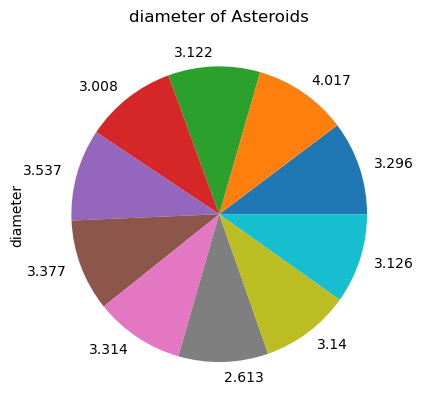

In [35]:
df['diameter'].value_counts() \
    .head(10) \
    .plot(kind='pie', title='diameter of Asteroids')

In [ ]:
df['diameter'] \
    .head(10) \
    .plot(kind='hist', title='Inclination of Asteroids')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


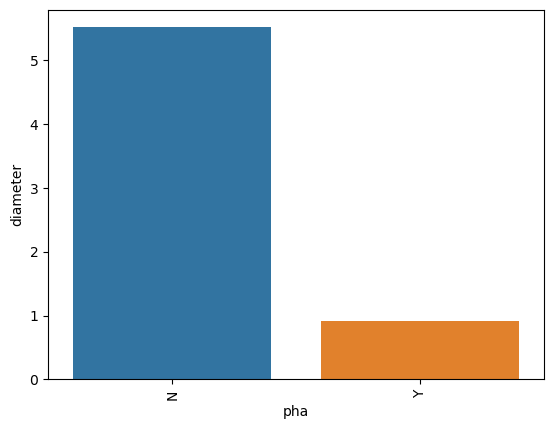

In [37]:
sns.barplot(x='pha', y='diameter', data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

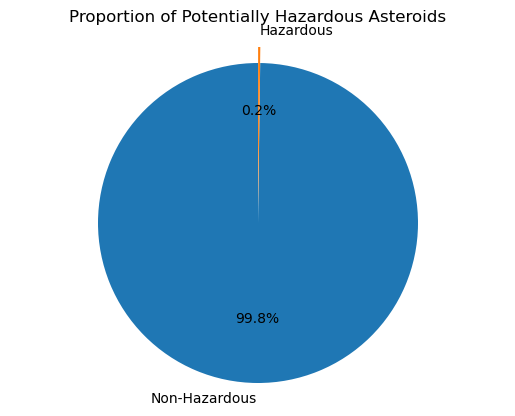

In [38]:
# Calculate the proportion of hazardous asteroids in the dataset
hazardous_count = df['pha'].value_counts()
labels = ['Non-Hazardous', 'Hazardous']
sizes = [hazardous_count[0], hazardous_count[1]]
explode = (0, 0.1) # Explode the hazardous slice by 10%

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Proportion of Potentially Hazardous Asteroids')

plt.show()

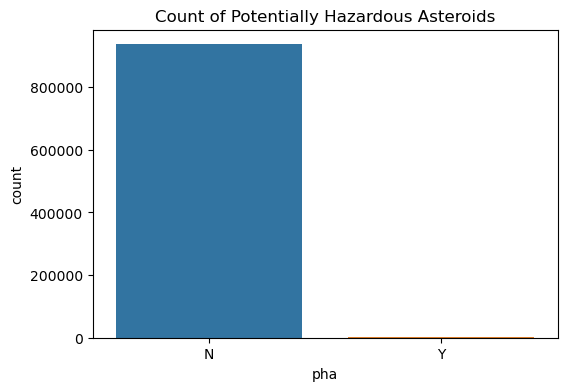

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='pha', data=df)
plt.title('Count of Potentially Hazardous Asteroids')
plt.show()

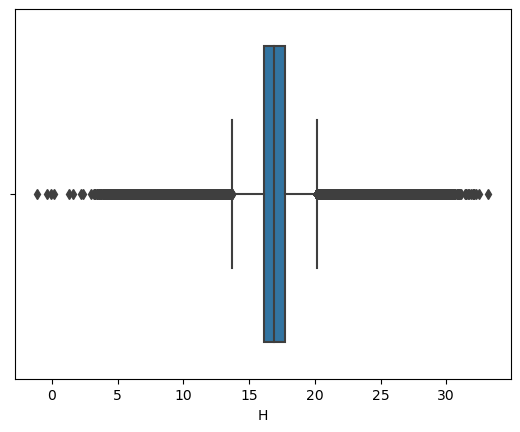

In [42]:
# create a box plot
sns.boxplot(x=df['H'])

# show the plot
plt.show()

In [49]:
colomns = ["per_y" , "per" , "ma" , "tp", ""]

In [50]:
df.drop(colomns, axis = 1, inplace=True)

In [51]:
df.describe


<bound method NDFrame.describe of               id    spkid          full_name      pdes     name prefix neo  \
0       a0000001  2000001            1 Ceres         1    Ceres    NaN   N   
1       a0000002  2000002           2 Pallas         2   Pallas    NaN   N   
2       a0000003  2000003             3 Juno         3     Juno    NaN   N   
3       a0000004  2000004            4 Vesta         4    Vesta    NaN   N   
4       a0000005  2000005          5 Astraea         5  Astraea    NaN   N   
...          ...      ...                ...       ...      ...    ...  ..   
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L      NaN    NaN   N   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L      NaN    NaN   N   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L      NaN    NaN   Y   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2      NaN    NaN   N   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3      NaN    NaN   N   

       pha       H  diameter 

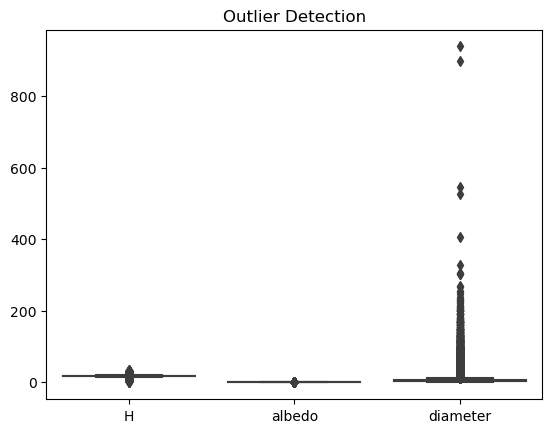

In [7]:
# Identify outliers using box plots
sns.boxplot(data=df[['H', 'albedo', 'diameter']])
plt.title('Outlier Detection')
plt.show()

In [8]:

z_scores = zscore(df[['H', 'albedo', 'diameter']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

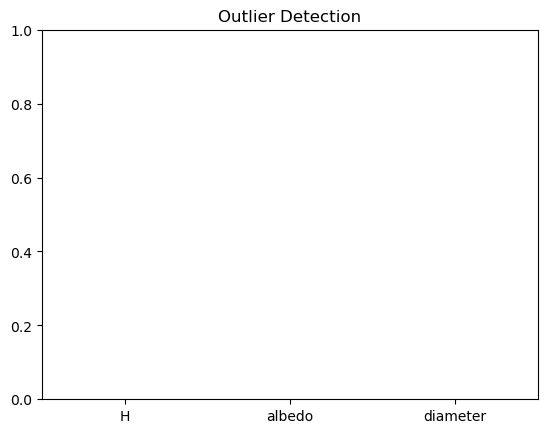

In [9]:
sns.boxplot(data=df[['H', 'albedo', 'diameter']])
plt.title('Outlier Detection')
plt.show()

In [10]:
print(df.isnull().sum())

id                0.0
spkid             0.0
full_name         0.0
pdes              0.0
name              0.0
prefix            0.0
neo               0.0
pha               0.0
H                 0.0
diameter          0.0
albedo            0.0
diameter_sigma    0.0
orbit_id          0.0
epoch             0.0
epoch_mjd         0.0
epoch_cal         0.0
equinox           0.0
e                 0.0
a                 0.0
q                 0.0
i                 0.0
om                0.0
w                 0.0
ma                0.0
ad                0.0
n                 0.0
tp                0.0
tp_cal            0.0
per               0.0
per_y             0.0
moid              0.0
moid_ld           0.0
sigma_e           0.0
sigma_a           0.0
sigma_q           0.0
sigma_i           0.0
sigma_om          0.0
sigma_w           0.0
sigma_ma          0.0
sigma_ad          0.0
sigma_n           0.0
sigma_tp          0.0
sigma_per         0.0
class             0.0
rms               0.0
dtype: flo

In [23]:
df['neo'] = pd.to_numeric(df['neo'], errors='coerce')
df['pha'] = pd.to_numeric(df['pha'], errors='coerce')

In [24]:
df["neo"] = df["neo"].astype(int)
df["pha"] = df["pha"].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              0 non-null      object 
 1   spkid           0 non-null      int64  
 2   full_name       0 non-null      object 
 3   pdes            0 non-null      object 
 4   name            0 non-null      object 
 5   prefix          0 non-null      object 
 6   neo             0 non-null      int64  
 7   pha             0 non-null      int64  
 8   H               0 non-null      float64
 9   diameter        0 non-null      float64
 10  albedo          0 non-null      float64
 11  diameter_sigma  0 non-null      float64
 12  orbit_id        0 non-null      object 
 13  epoch           0 non-null      float64
 14  epoch_mjd       0 non-null      int64  
 15  epoch_cal       0 non-null      float64
 16  equinox         0 non-null      object 
 17  e               0 non-null      float64
 18  a 

In [20]:
# # Fill in missing values using mean imputation
# imputer = SimpleImputer(strategy='mean')
# df[['H', 'albedo', 'diameter']] = imputer.fit_transform(df[['H', 'albedo', 'diameter']])
# Count missing values before imputation
print(df[['H', 'albedo', 'diameter','neo','pha']].isnull().sum())

# Fill in missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df[['H', 'albedo', 'diameter','neo','pha']] = imputer.fit_transform(df[['H', 'albedo', 'diameter','neo','pha']])

# Count missing values after imputation
print(df[['H', 'albedo', 'diameter','neo','pha']].isnull().sum())

H           0.0
albedo      0.0
diameter    0.0
neo         0.0
pha         0.0
dtype: float64


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by SimpleImputer.

In [25]:
df.dtypes


id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                 int64
pha                 int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma    